# Delineation progress of THUCS

- S and M HUC-12s
- 40,000 km<sup>2</sup> threshold

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import json
import glob

In [3]:
root_dir = "D:/AIMS/THUCS_TopAGNPS_Delineations/40k_SM/"
path_to_thucs = f'{root_dir}/tophuc_S_M_40000_closed_holes_with_container_thuc_merged_bbox_area_first_kept.gpkg'

path_to_quality_control_dir = f'{root_dir}/QualityControl/'
path_to_logs_dir = f'{root_dir}/LOGS/'

list_of_time_files = glob.glob(f'{path_to_logs_dir}*_time_log.txt')
list_of_fail_files = glob.glob(f'{path_to_logs_dir}*_fail_list.csv')

In [4]:
thucs = gpd.read_file(path_to_thucs)
thucs

,tophucid,drainage_area_sqkm,outlethuc12,outlethuc12_hutype,receivinghuc12,contained_hucs,num_contained_hucs,foreign_inflows,num_foreign_inflows,tophucid_bbox_container,totophuc,bbox_area_sqkm,geometry
0,0001,18511.97,010100081203,S,010100090601,"010100070506,010100080203,010100020601,0101000...",231,,0,None,OUTSIDE,42082.969472,"POLYGON ((-69.87252 46.05895, -69.87265 46.058..."
1,0002,528.01,010100100405,S,010100200502,"010100100404,010100100403,010100100401,0101001...",5,,0,None,OUTSIDE,1012.501683,"POLYGON ((-67.19422 46.29953, -67.19417 46.299..."
2,0003,17445.33,010100110704,S,Canada,"010100110607,010100050101,010100040805,0101000...",179,,0,None,OUTSIDE,47577.335062,"POLYGON ((-68.72955 46.30833, -68.72949 46.308..."
3,0004,21854.74,010200051007,S,010200051009,"010200050506,010200050906,010200040502,0102000...",253,,0,None,OUTSIDE,47294.634103,"POLYGON ((-69.67707 45.14552, -69.67684 45.145..."
4,0005,299.25,010200051008,S,010200051009,"010200051005,010200051006,010200051004,0102000...",4,,0,None,OUTSIDE,677.406841,"POLYGON ((-68.63373 44.57075, -68.63344 44.570..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,4801,750.98,210100050414,S,210100050800,"210100050410,210100050411,210100050402,2101000...",14,,0,None,OUTSIDE,1367.934062,"POLYGON ((-66.02006 18.10303, -66.02024 18.103..."
4796,4802,67.28,210100050502,S,210100050800,210100050502,1,,0,4801,OUTSIDE,147.438850,"POLYGON ((-66.06867 18.31400, -66.06867 18.314..."
4797,4803,189.53,210100050603,S,210100050800,"210100050601,210100050602,210100050603",3,,0,None,OUTSIDE,449.936768,"POLYGON ((-66.10624 18.20843, -66.10631 18.207..."
4798,4804,43.29,210100050604,S,210100050800,210100050604,1,,0,None,OUTSIDE,84.339453,"POLYGON ((-66.19629 18.34206, -66.19656 18.342..."


In [5]:
df_time = pd.concat([pd.read_csv(file) for file in list_of_time_files])
df_fail = pd.concat([pd.read_csv(file) for file in list_of_fail_files])

In [6]:
df_time = df_time.sort_values(by=['time_s'])
df_time = df_time.drop_duplicates(subset=['thuc'], keep='last')
df_time = df_time.reset_index(drop=True)
df_time['thuc'] = df_time['thuc'].astype(str)
df_time['thuc'] = df_time['thuc'].str.zfill(4)

In [7]:
p_thucs = thucs.copy(deep=True) # Processed THUCs

p_thucs = p_thucs[p_thucs['tophucid'].isin(df_time['thuc'])] # Remove THUCs that weren't processed
p_thucs = p_thucs.merge(df_time, left_on='tophucid', right_on='thuc', how='left') # Add process time
p_thucs = p_thucs.drop(columns=['thuc']) # Drop redundant column
p_thucs = p_thucs.rename(columns={'time_s': 'process_time_s'}) # Rename column

In [8]:
p_thucs

,tophucid,drainage_area_sqkm,outlethuc12,outlethuc12_hutype,receivinghuc12,contained_hucs,num_contained_hucs,foreign_inflows,num_foreign_inflows,tophucid_bbox_container,totophuc,bbox_area_sqkm,geometry,process_time_s
0,0002,528.01,010100100405,S,010100200502,"010100100404,010100100403,010100100401,0101001...",5,,0,None,OUTSIDE,1012.501683,"POLYGON ((-67.19422 46.29953, -67.19417 46.299...",31.502792
1,0005,299.25,010200051008,S,010200051009,"010200051005,010200051006,010200051004,0102000...",4,,0,None,OUTSIDE,677.406841,"POLYGON ((-68.63373 44.57075, -68.63344 44.570...",21.885824
2,0006,3299.62,010300010510,M,010300030603,"010300010507,010300010304,010300010308,0103000...",32,,0,None,OUTSIDE,6902.547883,"POLYGON ((-70.39024 45.49595, -70.39069 45.496...",311.572282
3,0009,4261.73,010500010810,S,010500040702,"010500010204,010500010708,010500010401,0105000...",50,,0,None,OUTSIDE,9259.315051,"POLYGON ((-67.73876 45.06822, -67.73891 45.068...",254.366683
4,0010,2094.41,010500020604,S,010500020703,"010500020301,010500020603,010500020101,0105000...",21,,0,None,OUTSIDE,3996.756812,"POLYGON ((-67.61816 44.78883, -67.61813 44.788...",120.830973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,4801,750.98,210100050414,S,210100050800,"210100050410,210100050411,210100050402,2101000...",14,,0,None,OUTSIDE,1367.934062,"POLYGON ((-66.02006 18.10303, -66.02024 18.103...",43.392365
4497,4802,67.28,210100050502,S,210100050800,210100050502,1,,0,4801,OUTSIDE,147.438850,"POLYGON ((-66.06867 18.31400, -66.06867 18.314...",6.516601
4498,4803,189.53,210100050603,S,210100050800,"210100050601,210100050602,210100050603",3,,0,None,OUTSIDE,449.936768,"POLYGON ((-66.10624 18.20843, -66.10631 18.207...",15.272495
4499,4804,43.29,210100050604,S,210100050800,210100050604,1,,0,None,OUTSIDE,84.339453,"POLYGON ((-66.19629 18.34206, -66.19656 18.342...",4.165510


In [9]:
qc_files = glob.glob(f'{path_to_quality_control_dir}/*.json')

def populate_quality_control(row):
    thuc_id = row['tophucid']
    qc_file = [file for file in qc_files if thuc_id in file]
    if len(qc_file) == 1:
        qc_file = qc_file[0]
        with open(qc_file) as f:
            qc = json.load(f)
            row['total_cells_area_sqm']           = qc['total_cells_area_sqm']
            row['total_boundary_area_sqm']        = qc['total_boundary_area_sqm']
            row['cells_missed_area_sqm']          = qc['cells_missed_area_sqm']
            row['beyond_boundary_cells_area_sqm'] = qc['beyond_boundary_cells_area_sqm']
            row['intersection_area_sqm']          = qc['intersection_area_sqm']
            row['fraction_boundary_covered']      = qc['fraction_boundary_covered']
            row['fraction_boundary_missed']       = qc['fraction_boundary_missed']
            row['north_touches']                  = True if 'North' in qc['touching_edges'] else False
            row['south_touches']                  = True if 'South' in qc['touching_edges'] else False
            row['east_touches']                   = True if 'East' in qc['touching_edges'] else False
            row['west_touches']                   = True if 'West' in qc['touching_edges'] else False
            
        return row
    else:
        return row

p_thucs = p_thucs.apply(populate_quality_control, axis=1)

In [10]:
p_thucs

,bbox_area_sqkm,beyond_boundary_cells_area_sqm,cells_missed_area_sqm,contained_hucs,drainage_area_sqkm,east_touches,foreign_inflows,fraction_boundary_covered,fraction_boundary_missed,geometry,...,outlethuc12_hutype,process_time_s,receivinghuc12,south_touches,tophucid,tophucid_bbox_container,total_boundary_area_sqm,total_cells_area_sqm,totophuc,west_touches
0,1012.501683,1.280461e+07,1.181076e+07,"010100100404,010100100403,010100100401,0101001...",528.01,False,,0.977622,0.022378,"POLYGON ((-67.19422 46.29953, -67.19417 46.299...",...,S,31.502792,010100200502,False,0002,None,5.277841e+08,5.287780e+08,OUTSIDE,False
1,677.406841,3.919185e+06,3.312184e+07,"010200051005,010200051006,010200051004,0102000...",299.25,False,,0.889230,0.110770,"POLYGON ((-68.63373 44.57075, -68.63344 44.570...",...,S,21.885824,010200051009,False,0005,None,2.990150e+08,2.698123e+08,OUTSIDE,False
2,6902.547883,9.674585e+06,8.586135e+08,"010300010507,010300010304,010300010308,0103000...",3299.62,False,,0.739618,0.260382,"POLYGON ((-70.39024 45.49595, -70.39069 45.496...",...,M,311.572282,010300030603,False,0006,None,3.297513e+09,2.448574e+09,OUTSIDE,False
3,9259.315051,3.419518e+07,9.888242e+07,"010500010204,010500010708,010500010401,0105000...",4261.73,False,,0.976786,0.023214,"POLYGON ((-67.73876 45.06822, -67.73891 45.068...",...,S,254.366683,010500040702,False,0009,None,4.259605e+09,4.194918e+09,OUTSIDE,False
4,3996.756812,1.810008e+07,1.735438e+07,"010500020301,010500020603,010500020101,0105000...",2094.41,False,,0.991709,0.008291,"POLYGON ((-67.61816 44.78883, -67.61813 44.788...",...,S,120.830973,010500020703,False,0010,None,2.093284e+09,2.094030e+09,OUTSIDE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,1367.934062,5.795943e+07,6.261199e+06,"210100050410,210100050411,210100050402,2101000...",750.98,False,,0.991676,0.008324,"POLYGON ((-66.02006 18.10303, -66.02024 18.103...",...,S,43.392365,210100050800,False,4801,None,7.522064e+08,8.039046e+08,OUTSIDE,False
4497,147.438850,1.353302e+06,2.073855e+06,210100050502,67.28,False,,0.969226,0.030774,"POLYGON ((-66.06867 18.31400, -66.06867 18.314...",...,S,6.516601,210100050800,False,4802,4801,6.738956e+07,6.666900e+07,OUTSIDE,False
4498,449.936768,1.248629e+06,2.061506e+06,"210100050601,210100050602,210100050603",189.53,False,,0.989139,0.010861,"POLYGON ((-66.10624 18.20843, -66.10631 18.207...",...,S,15.272495,210100050800,False,4803,None,1.898104e+08,1.889975e+08,OUTSIDE,False
4499,84.339453,3.103449e+06,1.560981e+06,210100050604,43.29,False,,0.963992,0.036008,"POLYGON ((-66.19629 18.34206, -66.19656 18.342...",...,S,4.165510,210100050800,False,4804,None,4.335097e+07,4.489343e+07,OUTSIDE,False


<AxesSubplot:>

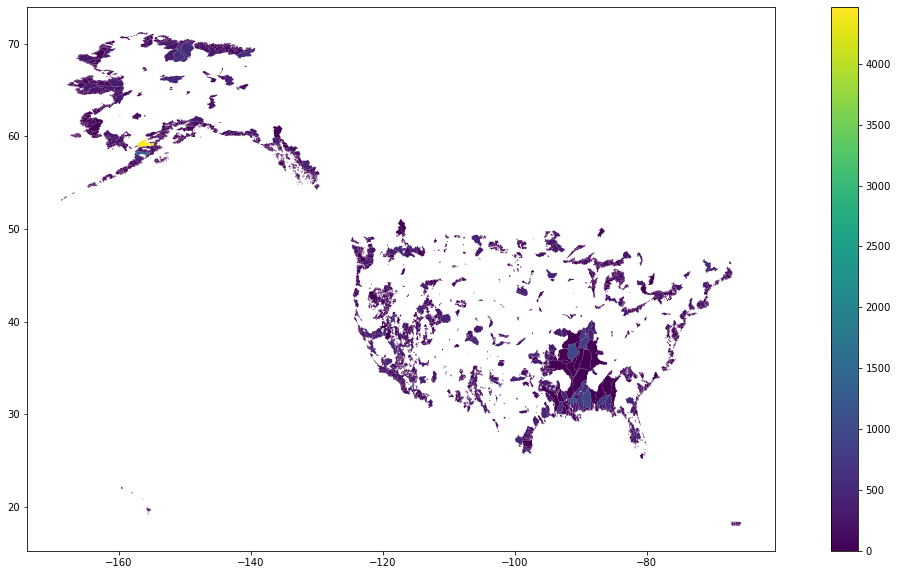

In [13]:
p_thucs.plot(column='process_time_s', legend=True, figsize=(20,10))

In [63]:
coverage_map = p_thucs.explore(column='fraction_boundary_covered', cmap='winter', tooltip=['tophucid', 'process_time_s', 'fraction_boundary_covered', 'fraction_boundary_missed', 'bbox_area_sqkm', 
                                                                                           'totophuc', 'drainage_area_sqkm', 'outlethuc12', 'outlethuc12_hutype', 'receivinghuc12', 'num_contained_hucs', 
                                                                                           'north_touches', 'south_touches', 'east_touches', 'west_touches'])
coverage_map

In [107]:
coverage_map.save(f'{root_dir}/coverage_map_40kSM_fraction_boundary_covered.html')